#### Data Source:  https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Car Price Prediction - Using Machine Learning Regressive algorithms


# Introduction
### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing relevant important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Lets import the csv file, into a dataframe, and start Data Wrangling

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

The dataset has total of 205 car models having total of 26 attributes (25 features + 1 label (price))

There are no null values

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Lets see some visualization for the given data

In [5]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

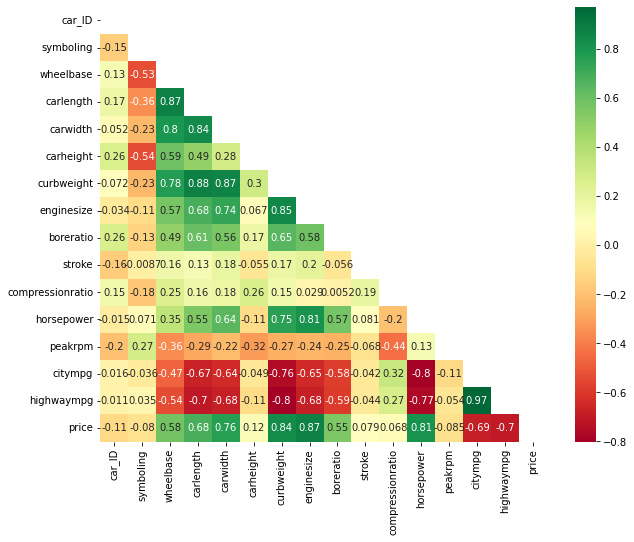

In [26]:
# Correlation matrix
plt.figure(figsize = (10,8))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()


### Looking at the co-relation coefficients, we can say that price is most correlated with 'enginesize', 'curbweight', 'horsepower'& 'carwidth' positively

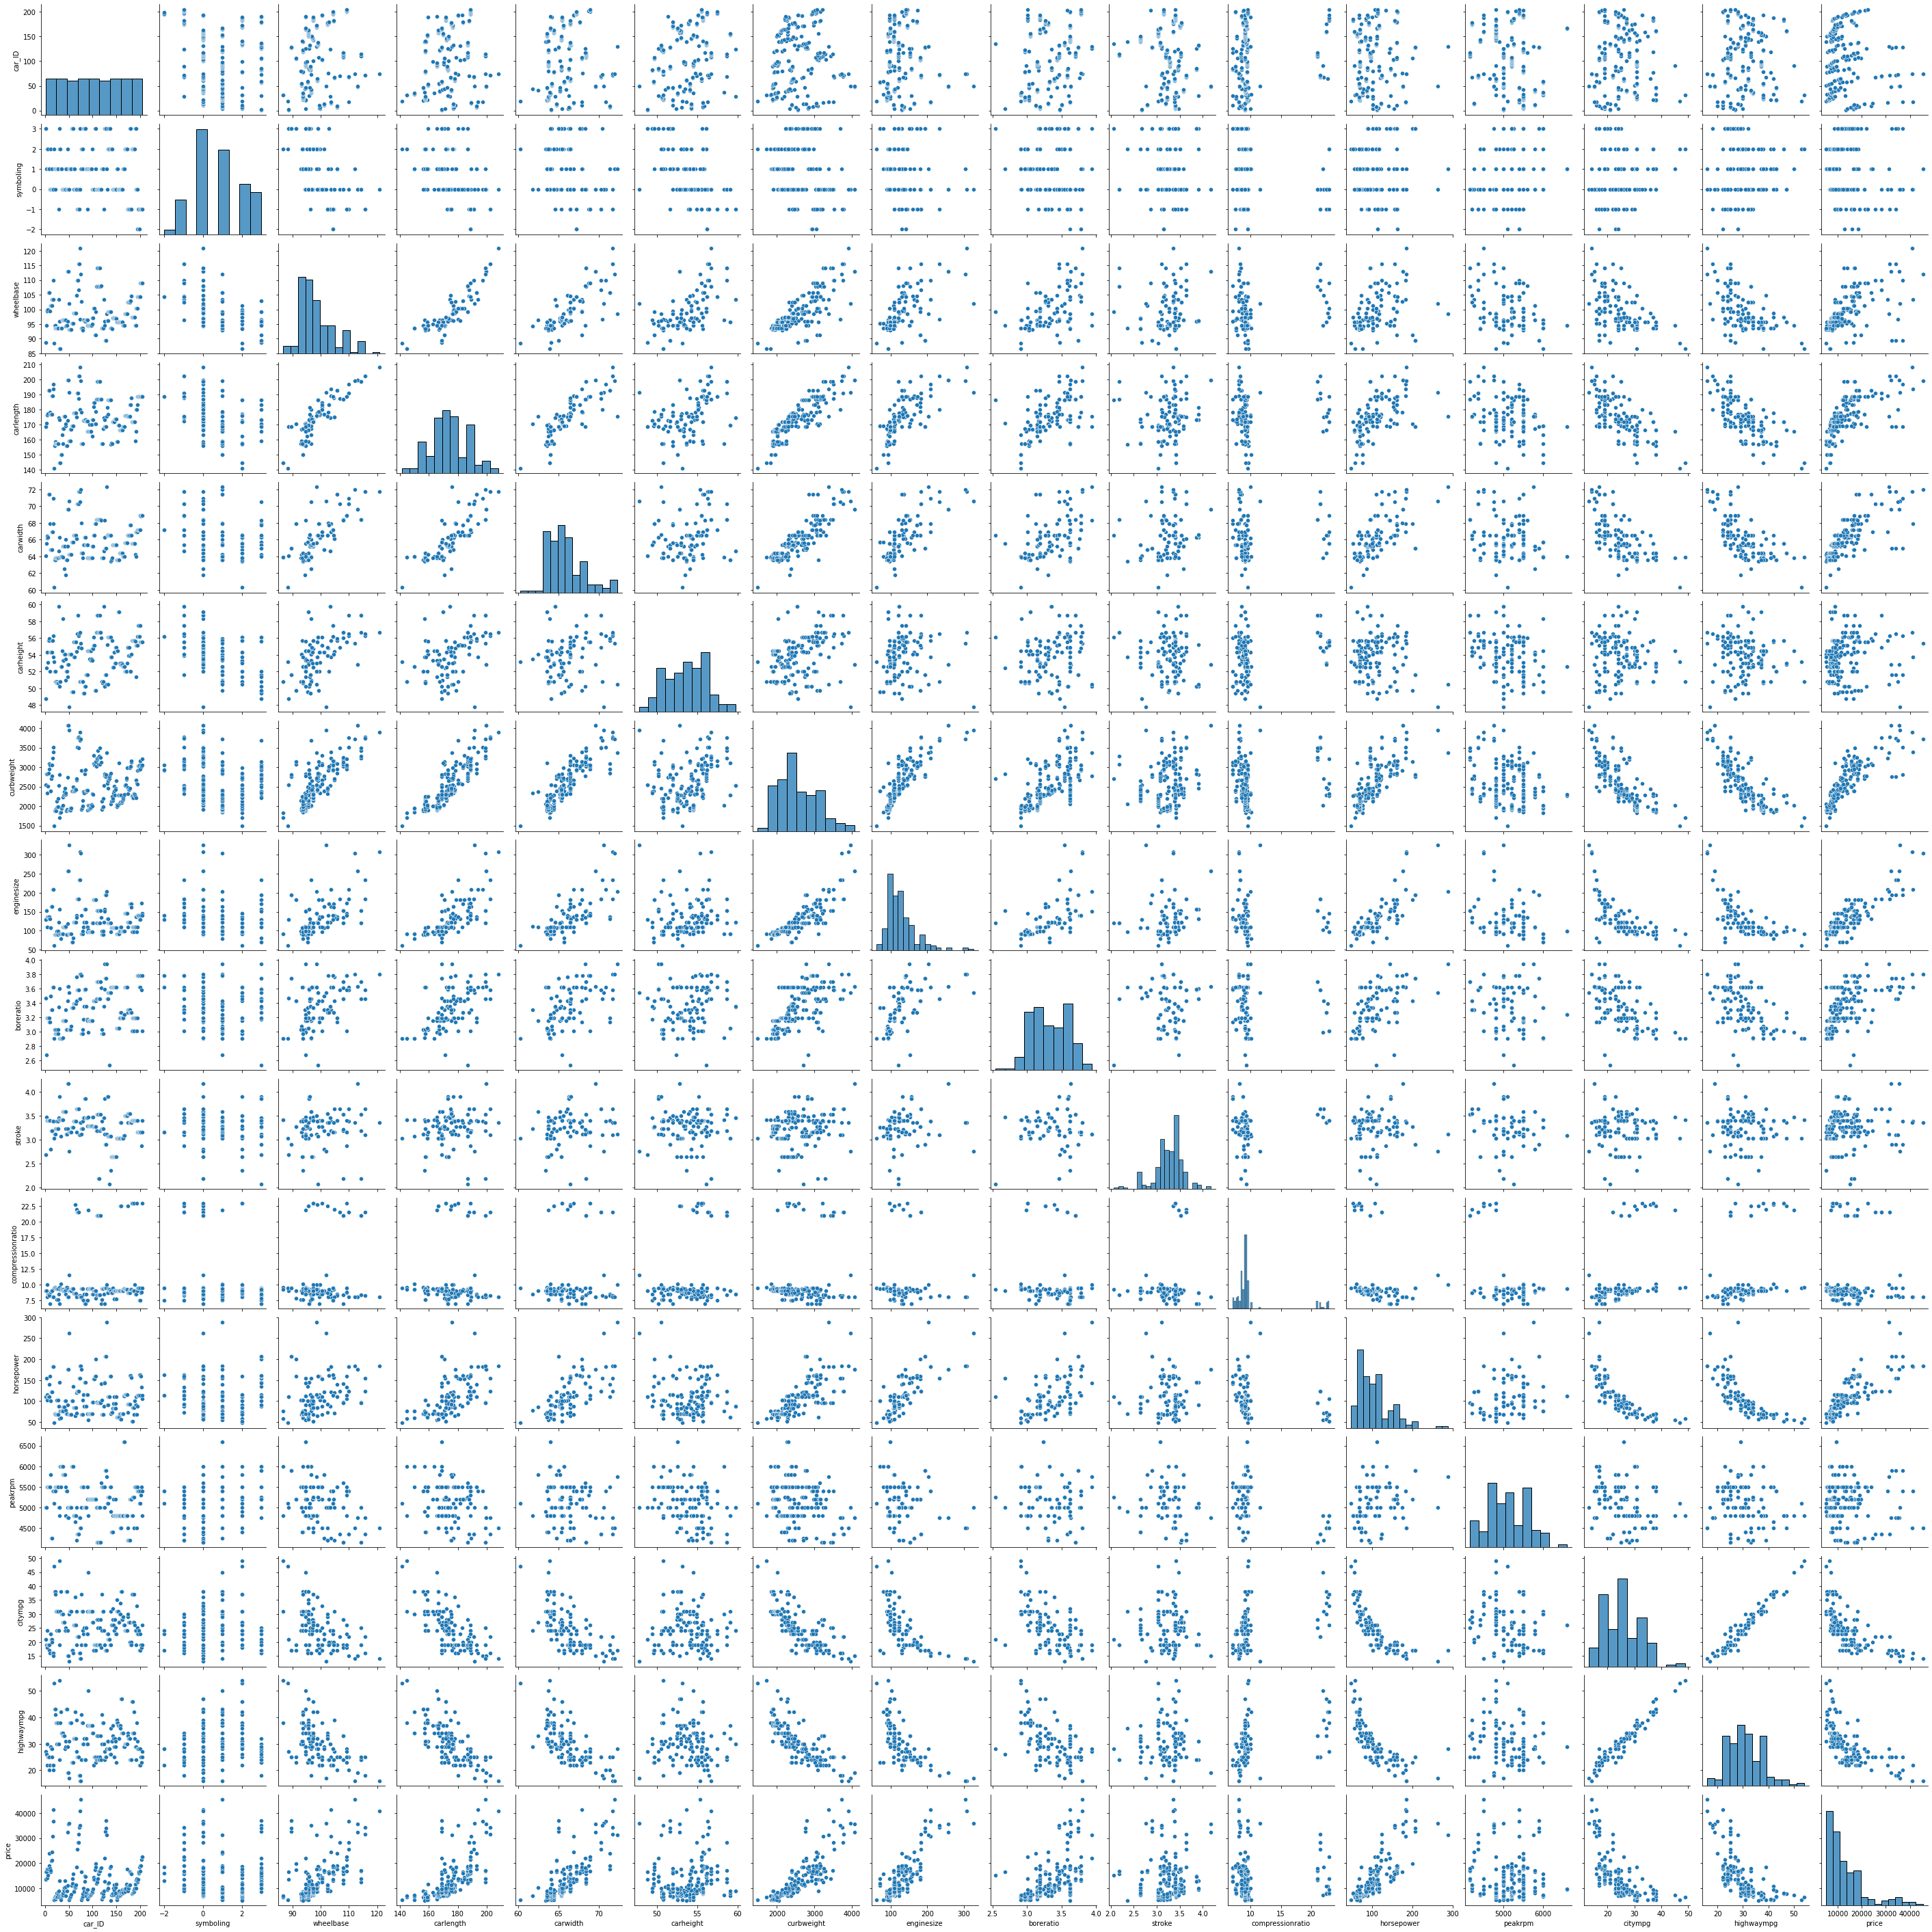

In [6]:
sns.pairplot(df)

### As there are 25 features, pairplot will be very messy...Hence plotting pairplot in two steps as follows: 

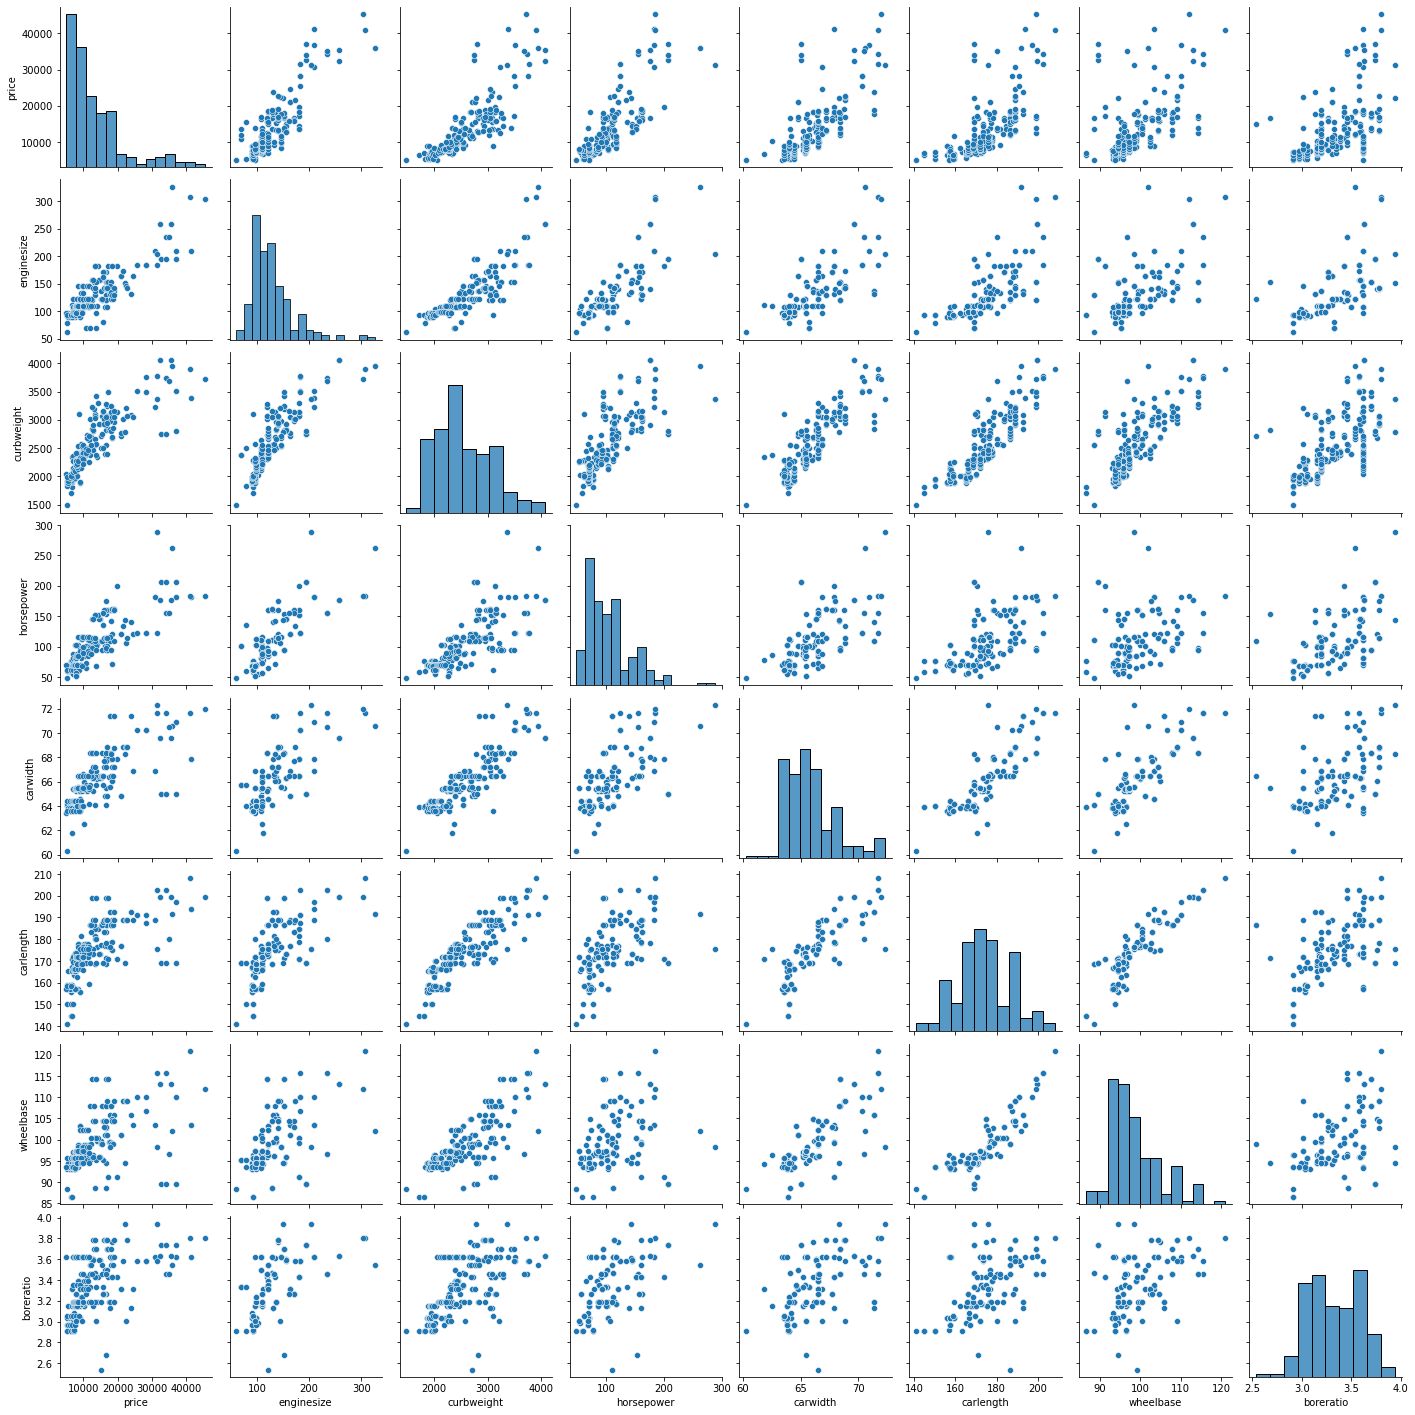

In [7]:
sns.pairplot(df[["price", "enginesize", "curbweight", "horsepower", "carwidth", "carlength", "wheelbase", "boreratio"]])

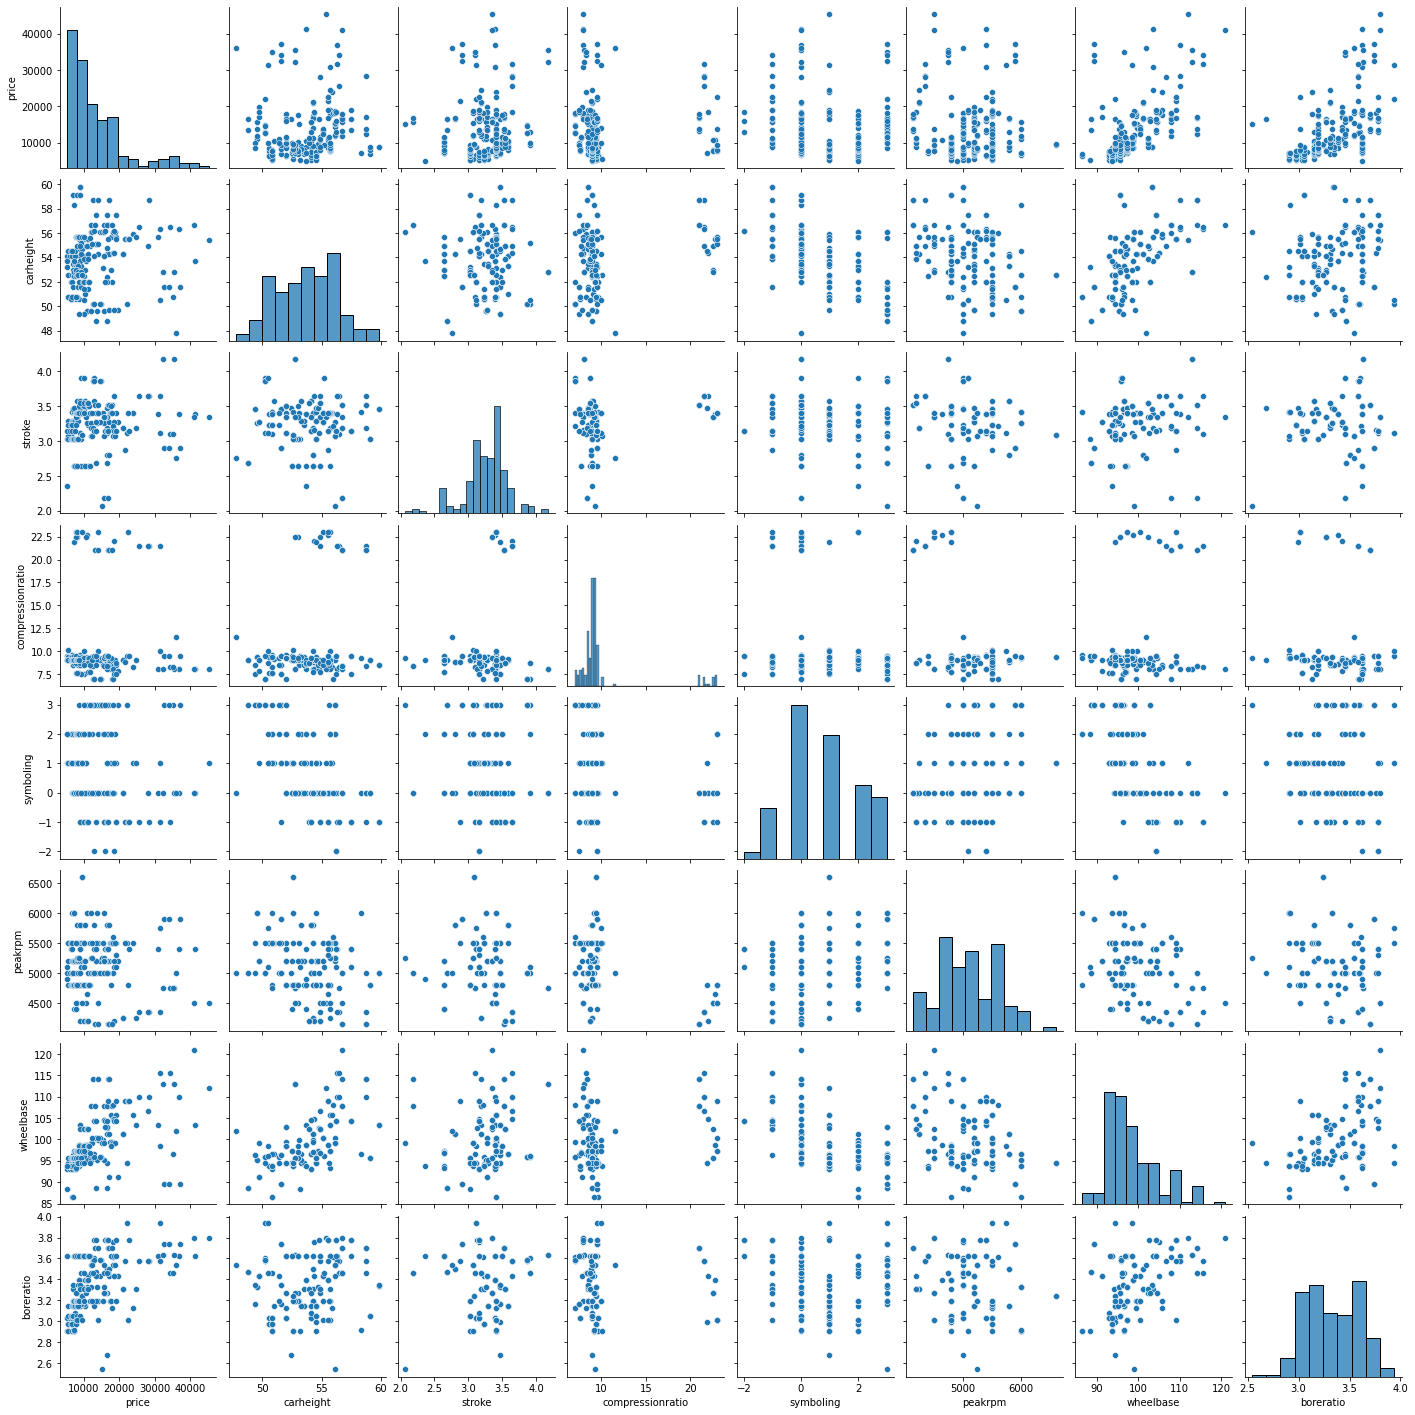

In [8]:
sns.pairplot(df[["price", "carheight", "stroke", "compressionratio", "symboling", "peakrpm", "wheelbase", "boreratio"]])

#### Looking at these histograms, and scatters, we can conclude that all numeric attributes are normal distributed except 'wheelbase', 'enginesize', 'compressionratio' and 'price' are right skewed which may cuase some effect on model training, so rescaling will be needed next. 
#### Also, the pairplot plotted with the first set of feature shows more corelation with price than the one plotted above. This backs the conclusion made by looking at the corelation matrix

In [9]:
def categories():
    for i in range(len(df.columns)):
        #if df[df.columns[i]].nunique() < 20:
        if df[df.columns[i]].nunique():
            if df[df.columns[i]].nunique() <= 7: 
                print("Number of Unique categories in",df.columns[i],df[df.columns[i]].nunique())
categories()

Number of Unique categories in symboling 6
Number of Unique categories in fueltype 2
Number of Unique categories in aspiration 2
Number of Unique categories in doornumber 2
Number of Unique categories in carbody 5
Number of Unique categories in drivewheel 3
Number of Unique categories in enginelocation 2
Number of Unique categories in enginetype 7
Number of Unique categories in cylindernumber 7


In [10]:
dummies_df = pd.get_dummies(df[["symboling","fueltype","aspiration",
                        "doornumber","carbody", "drivewheel", 
                        "enginelocation", "enginetype", "cylindernumber"]])
dummies_df

,symboling,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
201,-1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
202,-1,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
203,-1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
final_df = pd.concat([df, dummies_df],axis=1)
final_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,0,1,0,0,0,0,1,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,0,0,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,0,0,0,0,0,1,0,0,0,0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,0,0,0,0,0,1,0,0,0,0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,0,1,0,0,0,0,1,0,0,0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,0,0,0,0,0,0,1,0,0,0


### Separating Training and Testing dataset from original dataset for developing machine learning algorithms

In [12]:
final_df = final_df.drop(["CarName","symboling","fueltype","aspiration","doornumber","carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber","fuelsystem"],axis=1)

In [13]:
final_df

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,1,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,1,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,1,0,0,0,0
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,1,0,0,0,0
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,1,0,0,0,0,1,0,0,0
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
X = final_df.drop(columns=["price"], axis=1)

In [15]:
X

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,1,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,1,0,0,0,0,1,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,1,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,1,0,0,0,0
201,202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,1,0,0,0,0
202,203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,1,0,0,0,0,1,0,0,0
203,204,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
y = final_df["price"]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [17]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 44)
(41, 44)
(164,)
(41,)


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

#### Now all the dataset is in numerical format after converting all the categorical features into numerical using dummies

# Now applying Machine Learning Algos

### 1. MultiLinear Regression

Intercept:  -47979.8720145937
Coefficients:  [-1.40983344e+01  1.43807734e+02 -5.36584584e+01  6.43853846e+02
  1.67420770e+02  4.96685536e+00  6.76707791e+01 -1.63824447e+03
 -3.15230516e+03 -7.74832144e+01  9.15956379e+00  1.30337833e+00
 -9.13494586e+01  1.48481738e+02  7.69258560e+02 -7.69258560e+02
 -7.57466930e+02  7.57466930e+02  1.68793602e+02 -1.68793602e+02
  3.06121985e+03 -5.94501797e+02 -6.61434730e+02 -1.86380319e+02
 -1.61890300e+03 -8.61809841e+02 -4.29906520e+02  1.29171636e+03
 -5.53544161e+03  5.53544161e+03  8.09762246e+02  5.68434189e-14
 -2.46607938e+03  2.24730158e+03  2.17535850e+03 -4.05640800e+03
  1.29006505e+03  5.66741583e+03 -2.90296372e+03 -3.99240244e+03
 -5.45787377e+02  0.00000000e+00  4.83672658e+02  1.29006505e+03]
R2 socre is 0.8751849965731695
mean_sqrd_error is== 9662723.016795278
root_mean_squared error of is== 3108.492080864173


Text(0.5, 1.0, 'Actual vs. Multi-Linear reg Prediction')

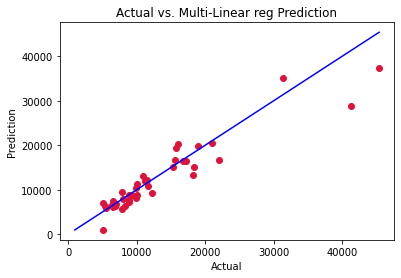

In [19]:
#Import Required Libraries for Linear Regression

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


mlin_regr = linear_model.LinearRegression()
mlin_regr.fit(X_train, y_train)

#Print the results of intercept and Coefficient values
print('Intercept: ', mlin_regr.intercept_)
print('Coefficients: ', mlin_regr.coef_)

# Prediction step
y_pred_mlin = mlin_regr.predict(X_test)  

# prediction accuracy score check
score=r2_score(y_test,y_pred_mlin)
print('R2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred_mlin))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred_mlin)))

# scatter for actual vs predition in MultiLinear Model

plt.scatter(x=y_test, y=y_pred_mlin,c='crimson')
p1 = max(max(y_pred_mlin), max(y_test))
p2 = min(min(y_pred_mlin), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Multi-Linear reg Prediction')

### 2. Decision Tree Regressor

R2 socre is 0.8634653048182054
mean_sqrd_error is== 10570018.871951219
root_mean_squared error of is== 3251.1565437473505


Text(0.5, 1.0, 'Actual vs. Decision Tree Prediction')

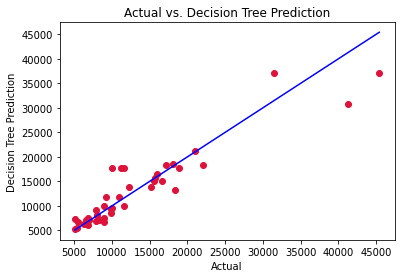

In [20]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_Tree_reg =DecisionTreeRegressor()
decision_Tree_reg.fit(X_train,y_train)

# Model Prediction
predictin_tree = decision_Tree_reg.predict(X_test)


# predicting the accuracy score
score=r2_score(y_test,predictin_tree)
print('R2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,predictin_tree))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,predictin_tree)))


# find scatter plot for prediction and actual

plt.scatter(x=y_test, y=predictin_tree, c= 'crimson')
p1 = max(max(predictin_tree), max(y_test))
p2 = min(min(predictin_tree), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual')
plt.ylabel('Decision Tree Prediction')
plt.title('Actual vs. Decision Tree Prediction')

### 3. Random Forest

R2 socre is 0.8987676918396428
mean_sqrd_error is = 7837036.632201257
root_mean_squared error of is = 2799.47077716508


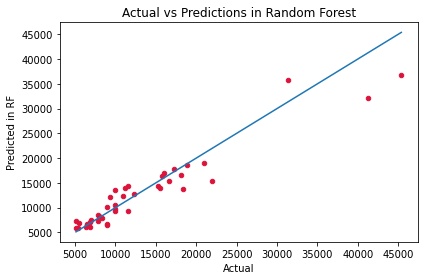

In [21]:
from sklearn.ensemble import RandomForestRegressor

Rand_FR = RandomForestRegressor(n_estimators=500, n_jobs=-1)

Rand_FR.fit(X_train, y_train)
y_pred_rf = Rand_FR.predict(X_test)

# Plot a scatter between predicted and actual
plt.scatter(y_test, y_pred_rf, s=20, c='crimson')
plt.title('Actual vs Predictions in Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted in RF')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()


# predicting the accuracy score
score=r2_score(y_test,y_pred_rf)
print('R2 socre is',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_pred_rf))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_pred_rf)))